In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k1 = 0.2
k2 = 0.1 # k-1

In [3]:
A0 = 1 # mol/L
B0 = 0 # mol/L

In [4]:
T = 30
dt = 0.1
t = np.linspace(0, T, int(T/dt) + 1)

In [5]:
def dAdt(A, B):
    return -k1*A + k2*B

def dBdt(A, B):
    return k1*A - k2*B

In [6]:
# Estimate by Runge-Kutta Method
A_rk = np.zeros(len(t))
A_rk[0] = A0

B_rk = np.zeros(len(t))
B_rk[0] = B0

for it in range(1, len(t)):    
    xk1 = dAdt(A_rk[it-1], B_rk[it-1])
    yk1 = dBdt(A_rk[it-1], B_rk[it-1])
    xk2 = dAdt(A_rk[it-1] + xk1 * dt/2, B_rk[it-1] + yk1 * dt/2)
    yk2 = dBdt(A_rk[it-1] + xk1 * dt/2, B_rk[it-1] + yk1 * dt/2)
    xk3 = dAdt(A_rk[it-1] + xk2 * dt/2, B_rk[it-1] + yk2 * dt/2)
    yk3 = dBdt(A_rk[it-1] + xk2 * dt/2, B_rk[it-1] + yk2 * dt/2)
    xk4 = dAdt(A_rk[it-1] + xk3 * dt, B_rk[it-1] + yk3 * dt)
    yk4 = dBdt(A_rk[it-1] + xk3 * dt, B_rk[it-1] + yk3 * dt)

    A_rk[it] = A_rk[it-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    B_rk[it] = B_rk[it-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)

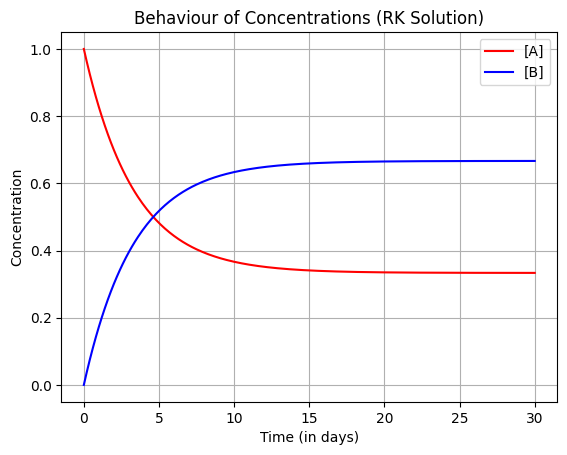

In [7]:
plt.plot(t, A_rk, label='[A]', color='red')
plt.plot(t, B_rk, label='[B]', color='blue')
plt.xlabel('Time (in days)')
plt.ylabel('Concentration')
plt.title('Behaviour of Concentrations (RK Solution)')
plt.legend()
plt.grid()

plt.show()